# 

## Experiment info

git commit: [e0d9f69076520c814c24ecafb438fa387afc1687](https://github.com/jzkelter/tabular-standards/commit/e0d9f69076520c814c24ecafb438fa387afc1687)


Experiment 1
```
["setup-structure" "Single-PG&CG-TC=1.json"]
["max-prod-capacity-per-capita" 0.2 0.4 0.6 0.8 1 1.1 1.2 1.3 1.4 1.6 1.8 2 3 4]
["MIN-WAGE-RATE" 2.5]
["DIMINISHING-UTILITY-CONSTANT" 0.3 0.6 0.9]
["pick-cheapest-firm?" true false]
["delli-gatti-consumer-search?" false]
["N-TRADING-LINKS" 7]
["MONTHS-TO-LOWER-WAGE" 12]
["layoff-probability" 0.5]
["n-households" 1000]
["n-firms" 60]
["SEARCH-N" 5]
["fix-n-framework-agreements?" false]
["PROB-REPLACE-FIRM-PRICE" 0.25]
["framework-duration" 24]
["MAX-PRICE-CHANGE" 0.2]
["index-in-use" "no index"]
["SEARCH-BETTER-JOB-PROB" 0.1]
["mean-new-agreements-per-month" 2]
["firm-memory-constant" 0.8]
["min-wage-80%-of-tech-param?" false]
["STARTUP-LIQUIDITY" 100]
["primary-good-prod-function" "linear"]
["alpha" 1]
["transactions-per-month" 1]
["DESIRED-BUFFER-FRAC" 0.5]
["RES-WAGE-CHANGE" 0.9]
["N-FRAMEWORK-AGREEMENTS" 7]
["s" 0.1]
["BUFFER-LABOR-FRACTION" 0.3]
["firm-competency" 0]
["MAX-WAGE-CHANGE" 0.2]
["PROB-REPLACE-FIRM-QUANT" 0.5]
["BACKGROUND-IMPROVEMENT" "10"]
```
Time limit: 1000

reporters:
```
unemployment-rate
mean-consumer-demand-not-satisfied
mean-firm-demand-not-satisfied
total-sales
cg-production
consumer-demand
mean-wage-rate
mean-cg-price
mean-pg-price
mean-current-profit-all-firms
mean-lifetime-profit-all-firms
turnover-rate
bankrupt-firms
mean-age
mean-inventories
pringle-index-value
coats-index-value
ussher-index-value
potvin-index-value
gini-firms
gini-pg-sales
gini-households
```

## data processing and helper functions

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


def load_data(filenames):
    dfs = []
    for f in filenames:
        filename = f
        dfs.append(pd.read_csv(f, skiprows=6))
    return pd.concat(dfs)

filenames = ['vary prod capacity.csv', 'vary prod capacity mpc=5-7.csv', 'vary prod capacity mpc=8-10.csv'] 
df = load_data(filenames)

df['mean-current-profit-all-firms/price'] = df['mean-current-profit-all-firms'] / df['mean-pg-price']
df['mean-lifetime-profit-all-firms/price'] = df['mean-lifetime-profit-all-firms'] / df['mean-pg-price']
df['mean-wage-rate/cg-price'] = df['mean-wage-rate'] / df['mean-cg-price']

def map_setup_structure_to_firm_ratio(ss):
    if ".25PG" in ss:
        return 0.25
    elif "1PG" in ss:
        return 1
    
# df["pg-to-cg-ratio"] = df['setup-structure'].apply(map_setup_structure_to_firm_ratio)
#  "Single-PG&CG-TC=2.json" "Single-PG&CG-TC=3.json"
# ## tech parameter of
# df1 = df[df["setup-structure"] == "Single-PG&CG-TC=1.json"]

# # ## Two layer setup PG -> CG setup
# # df2 = df[df["setup-structure"] == "Two-Layer-PG-CG.json"]




In [156]:
PLOT_VARS = ['unemployment-rate', 'total-sales', 'cg-production', 'consumer-demand', 
             'mean-wage-rate', 'mean-cg-price', 'mean-pg-price', 'mean-wage-rate/cg-price',
             'mean-consumer-demand-not-satisfied', 'mean-firm-demand-not-satisfied',
             'turnover-rate','bankrupt-firms', 'mean-current-profit-all-firms', 'mean-current-profit-all-firms/price',
             'mean-lifetime-profit-all-firms', 'mean-lifetime-profit-all-firms/price',      
             'mean-age', 'mean-inventories', 'pringle-index-value', 'coats-index-value', 
             'ussher-index-value', 'potvin-index-value', 'gini-firms', 'gini-pg-sales', 'gini-households']

def plot_mean_vs_prod_capacity(ladf, var, separate_lines_var, title="default", legend=False, ylabel="default"):    
    plt.figure()
    sep_lines_vars = ladf[separate_lines_var].unique()
    for slv in sep_lines_vars:
        tladf = ladf[ladf[separate_lines_var]==slv]
        plt.plot(tladf['max-prod-capacity-per-capita'], tladf[var]['mean'])
        plt.fill_between(tladf['max-prod-capacity-per-capita'], tladf[var]['mean'] + tladf[var]['std'], tladf[var]['mean'] - tladf[var]['std'], alpha=0.5)

    if title=="default":
        title = var + " vs Productive Capacity"
    if legend:
        plt.legend(sep_lines_vars, title=separate_lines_var)
    if ylabel == "default":
        ylabel = var.replace('-', ' ').title()

    plt.xlabel("productive capacity per capita")    
    plt.ylabel(ylabel)
    plt.title(title)    
    plt.show()


def plot_vars_vs_prod_capacity(ladf, separate_lines_var):        
    for v in PLOT_VARS:
        plot_mean_vs_prod_capacity(ladf, v, separate_lines_var)
        

## Functions for plotting a subplot with multiple var plotted against productive capacity
def subplots_mean_vs_prod_capacity(ladf, var, subplot_var, separate_lines_var,  fill_between=True):    
    subplot_vars = ladf[subplot_var].unique()
    fig, ax = plt.subplots(nrows=1, ncols=len(subplot_vars), figsize=(15, 4))
    for i, spv in enumerate(subplot_vars):            
        sep_lines_vars = ladf[separate_lines_var].unique()
        for slv in sep_lines_vars:
            tladf = ladf[(ladf[subplot_var]==spv) & (ladf[separate_lines_var]==slv)]
            ax[i].plot(tladf['max-prod-capacity-per-capita'], tladf[var]['mean'])
            if fill_between:
                ax[i].fill_between(tladf['max-prod-capacity-per-capita'], tladf[var]['mean'] + tladf[var]['std'], tladf[var]['mean'] - tladf[var]['std'], alpha=0.5)

        ax[i].legend(sep_lines_vars, title=separate_lines_var)
        ax[i].set_xlabel("max productive capacity per capita")
        ax[i].set_ylabel(var)
        ax[i].set_title(var + " vs max-prod-cap\n" + subplot_var + "==" + str(spv))    
    plt.show()

        
def subplot_vars_vs_prod_capacity(ladf, subplot_var, separate_lines_var, fill_between=False):        
    for v in PLOT_VARS:
        subplots_mean_vs_prod_capacity(ladf, v, subplot_var, separate_lines_var, fill_between=fill_between)
        
## time series subplots
def subplot_timeseries(ldf, var, subplot_var, separate_lines_var):
    subplot_vars = ldf[subplot_var].unique()
    fig, ax = plt.subplots(nrows=1, ncols=len(subplot_vars), figsize=(18, 4))
    for i, spv in enumerate(subplot_vars):            
        sep_lines_vars = ldf[separate_lines_var].unique()
        for slv in sep_lines_vars:
            tldf = ldf[(ldf[subplot_var]==spv) & (ldf[separate_lines_var]==slv)]
            ax[i].plot(tldf['[step]'], tldf[var])

        ax[i].legend(sep_lines_vars, title=separate_lines_var)
        ax[i].set_xlabel("ticks")
        ax[i].set_ylabel(var)
        ax[i].set_title(var + " timeseries\n" + subplot_var + "==" + str(spv))    
    plt.show()
    
def subplot_var_timeseries(ldf, subplot_var, separate_lines_var):
    for v in PLOT_VARS:
        subplot_timeseries(ldf, v, subplot_var, separate_lines_var)
        
## Time series plots     
def plot_timeseries(ldf, var):
    plt.figure()
    plt.plot(ldf['[step]'], ldf[var])
    plt.xlabel("ticks")
    plt.ylabel(var)
    plt.title(var + " timeseries")   
    plt.show()

def plot_var_timeseries(ldf):
    for v in PLOT_VARS:
        plot_timeseries(ldf, v)

## Single-PG&CG-Firm 

### plot mean variables

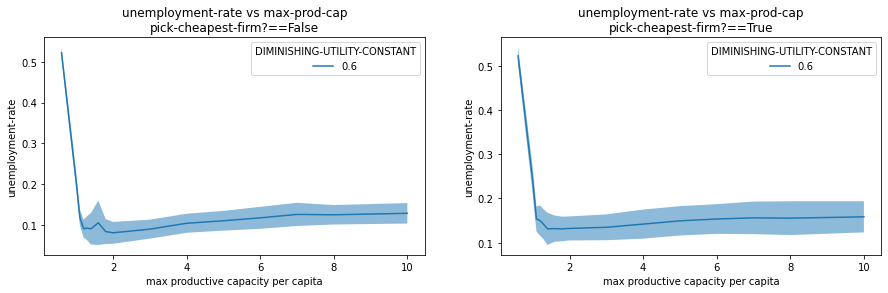

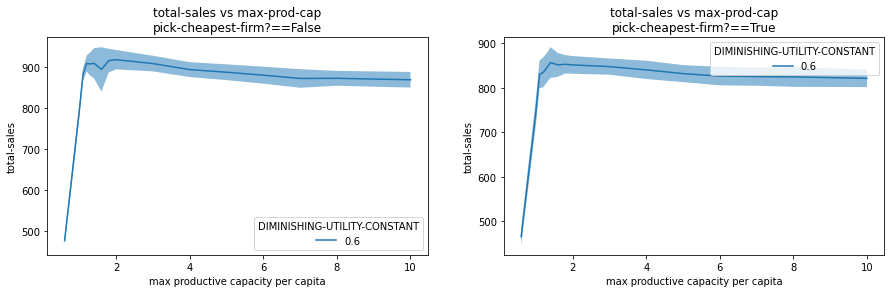

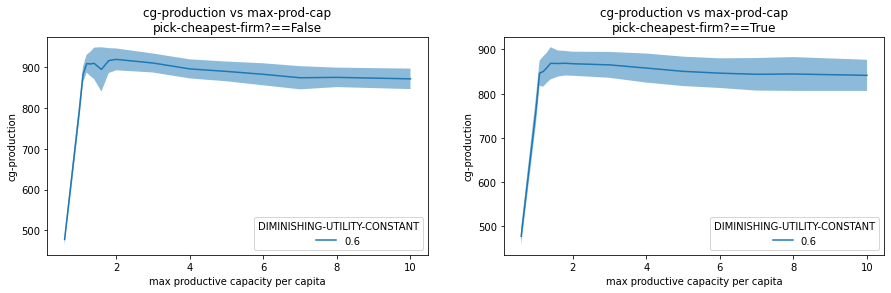

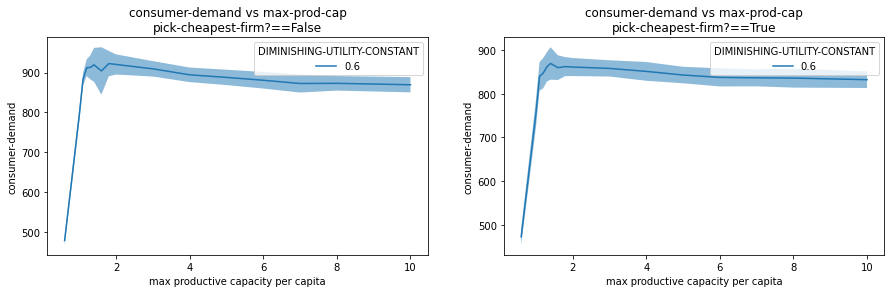

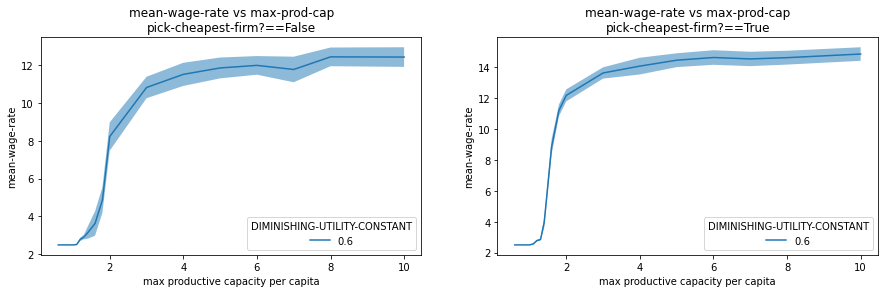

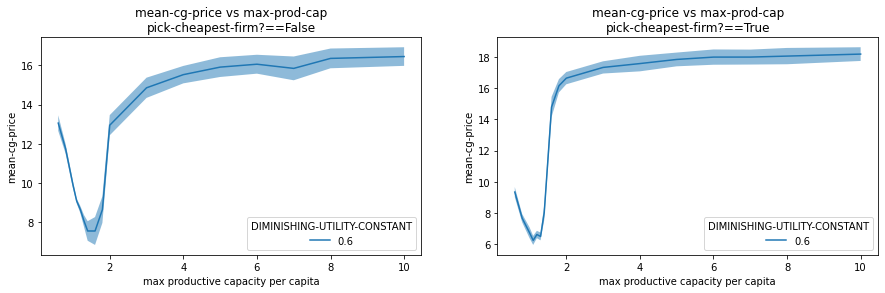

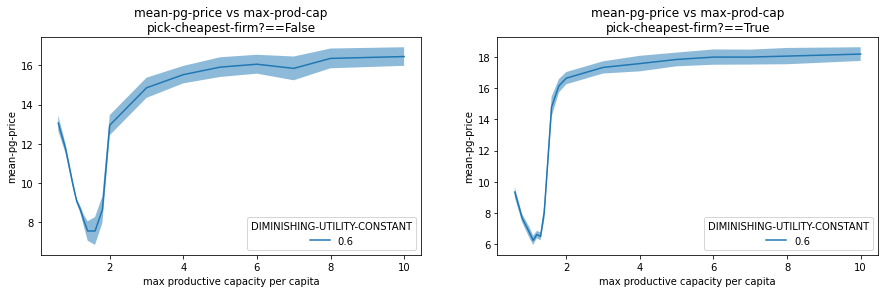

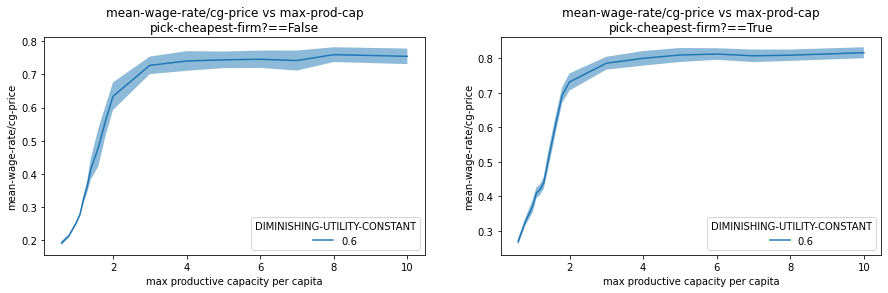

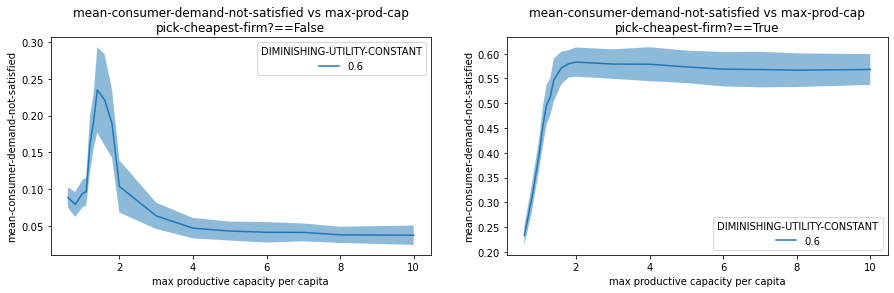

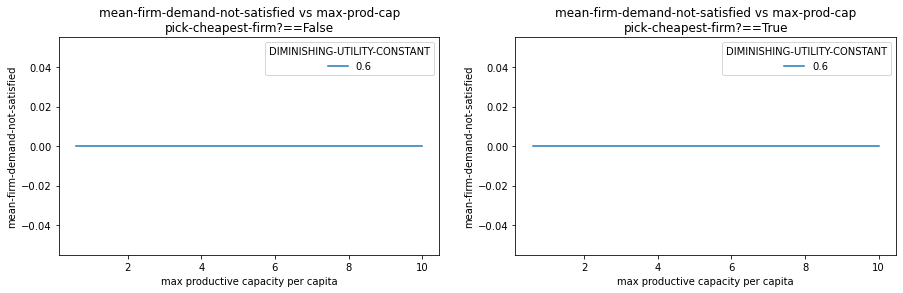

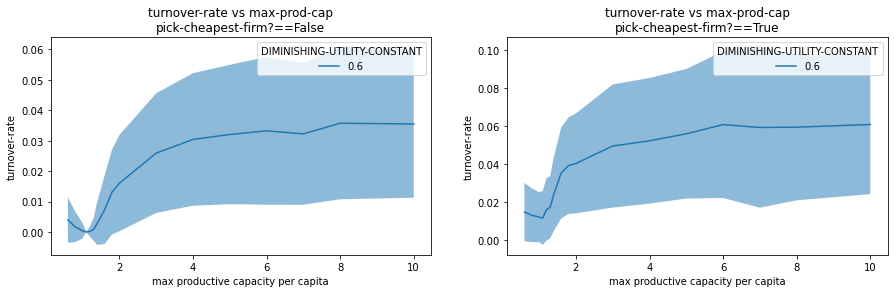

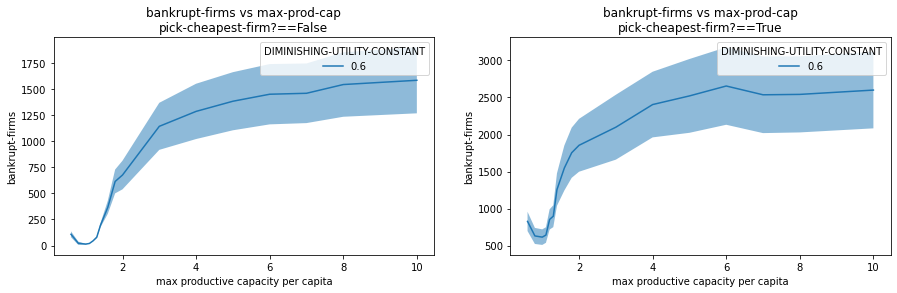

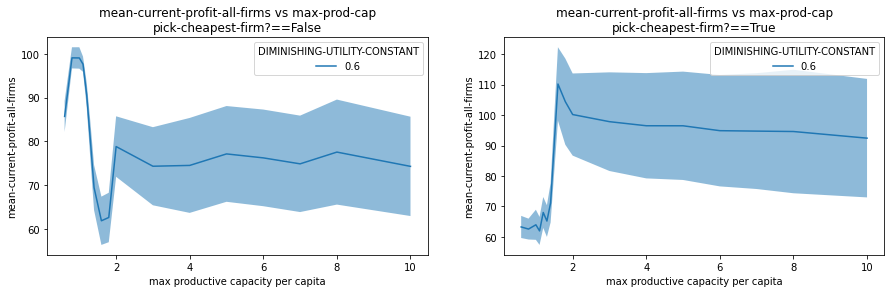

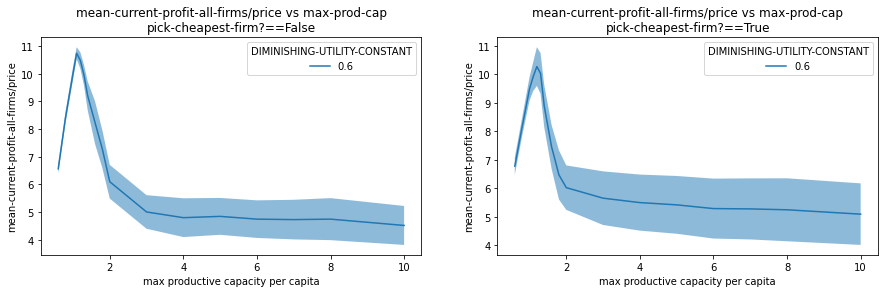

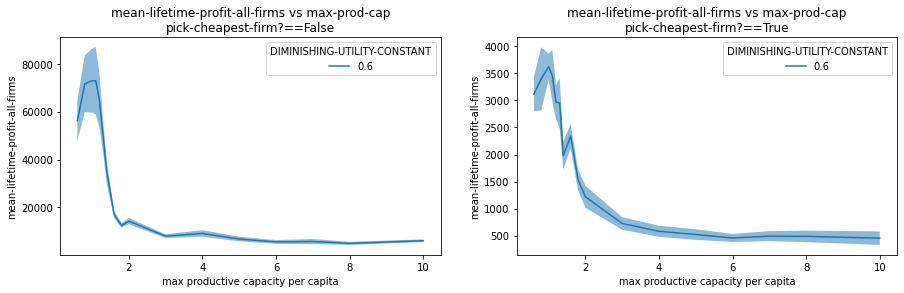

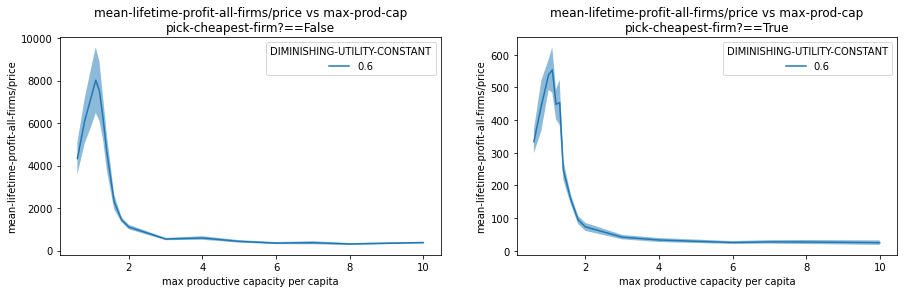

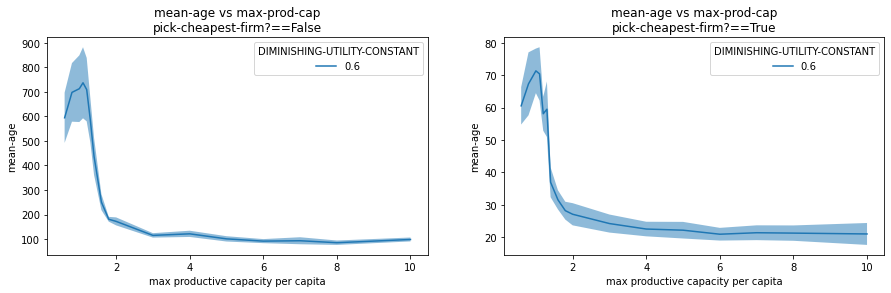

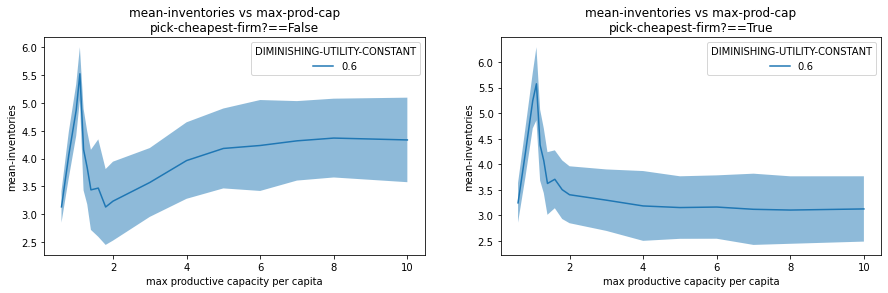

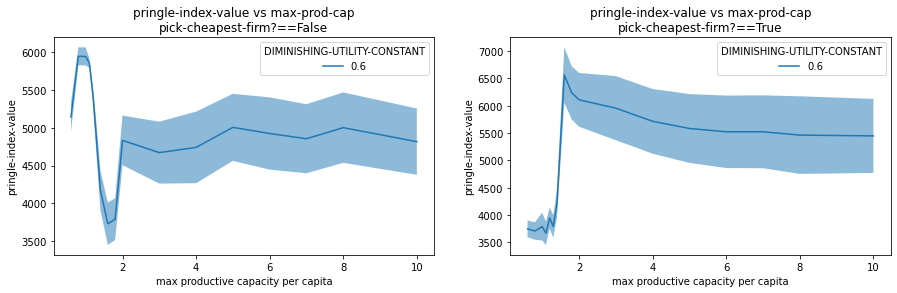

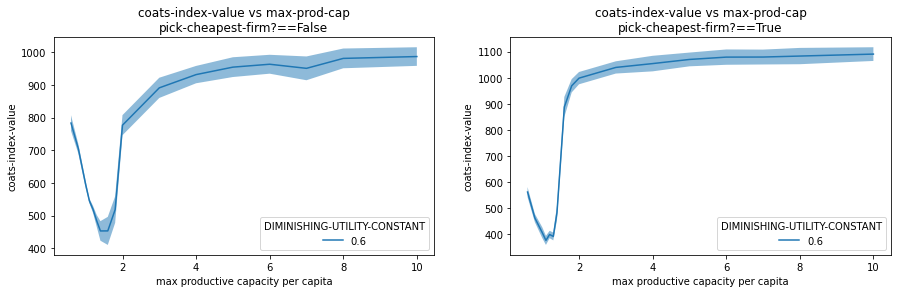

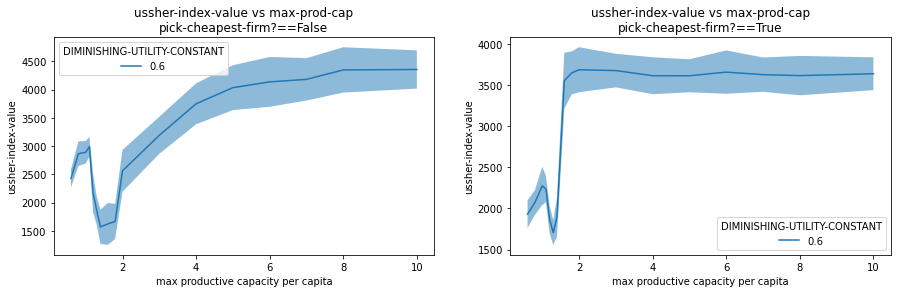

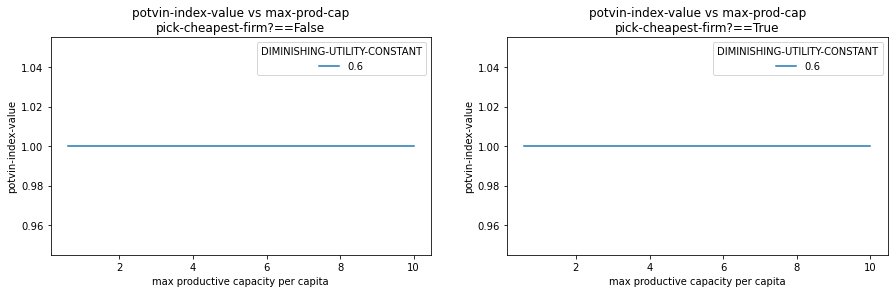

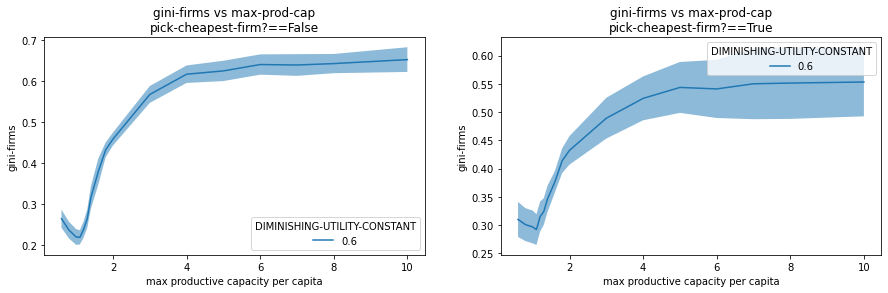

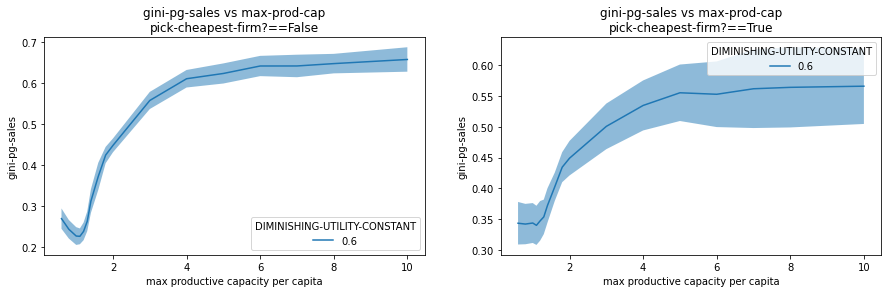

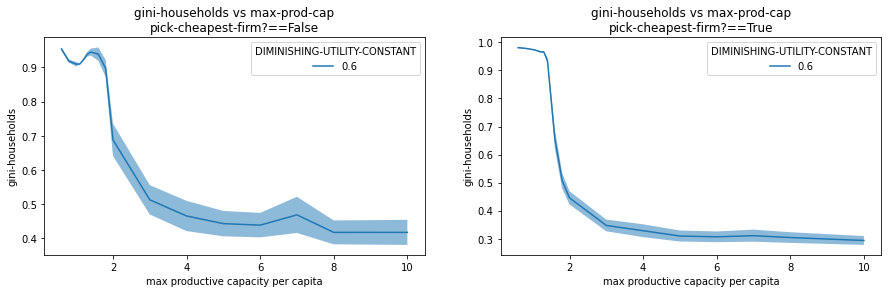

In [161]:
# ["DIMINISHING-UTILITY-CONSTANT" 0.3 0.6 0.9]
# ["pick-cheapest-firm?" true false]
# 0.2 0.4 0.6 0.8 1 1.1 1.2 1.3 1.4 1.6 1.8 2 3 4

# adf = df[(df['[step]'] >= 2000) & (df['setup-structure']=="Single-PG&CG-TC=2.json")].groupby('max-prod-capacity-per-capita').mean()
# pdf = df[((df['max-prod-capacity-per-capita'] > 1) & (df['[step]'] >= 500)) | (df['[step]'] >= 5000)]

pdf = df[(df['[step]'] >= 500) & (df['max-prod-capacity-per-capita'] >= .6)]

groups = ['max-prod-capacity-per-capita', "pick-cheapest-firm?", 'DIMINISHING-UTILITY-CONSTANT']
aggregators = ['mean', 'std']
adf = pdf.groupby(groups).aggregate(aggregators).reset_index()


# plot_vars_vs_prod_capacity(adf[adf['pick-cheapest-firm?']==False], "DIMINISHING-UTILITY-CONSTANT")
# subplot_vars_vs_prod_capacity(adf, "DIMINISHING-UTILITY-CONSTANT", 'pick-cheapest-firm?')

subplot_vars_vs_prod_capacity(adf[adf['DIMINISHING-UTILITY-CONSTANT'].isin([.6])], "pick-cheapest-firm?", "DIMINISHING-UTILITY-CONSTANT", fill_between=True)
# fadf = adf[(adf['DIMINISHING-UTILITY-CONSTANT'].isin([.6])) & (adf['pick-cheapest-firm?']==False)]
# plot_vars_vs_prod_capacity(fadf, "DIMINISHING-UTILITY-CONSTANT")


In [133]:
cols = ['max-prod-capacity-per-capita', "unemployment-rate", "total-sales", "cg-production", "consumer-demand", "mean-wage-rate", "mean-cg-price", 'turnover-rate', 'bankrupt-firms', 'mean-current-profit-all-firms/price', 'mean-lifetime-profit-all-firms/price']
adf[(adf["DIMINISHING-UTILITY-CONSTANT"]==.6) & (adf['pick-cheapest-firm?']==True)][cols]

### Plots for paper

In [273]:
## Process Data

pdf = df[(df['[step]'] >= 500) & 
         (df['max-prod-capacity-per-capita'] >= .2) & 
         (df['pick-cheapest-firm?']==False) & 
         df['DIMINISHING-UTILITY-CONSTANT'].isin([.6])
        ]
groups = ['max-prod-capacity-per-capita', "pick-cheapest-firm?", 'DIMINISHING-UTILITY-CONSTANT']
aggregators = ['mean', 'std']
adf = pdf.groupby(groups).aggregate(aggregators).reset_index()
fadf = adf

#### Means vs Productive Capacity of the Land

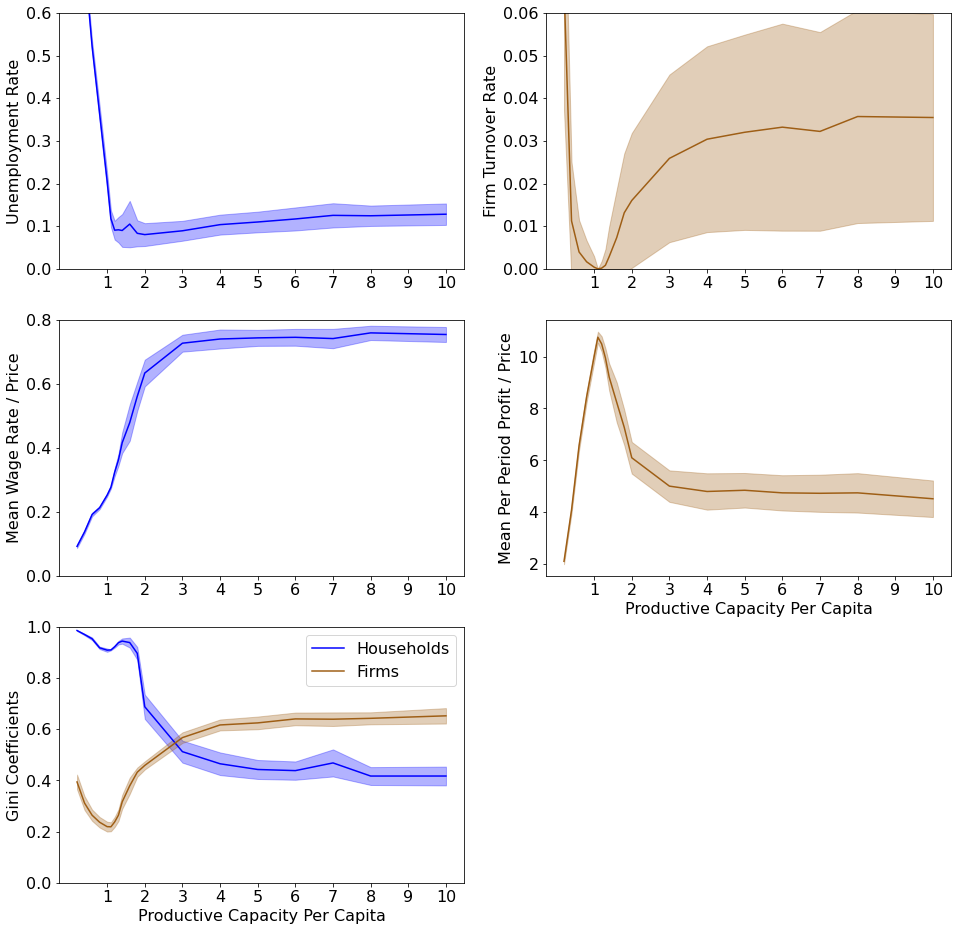

In [316]:
matplotlib.rcParams.update({'font.size': 16})
def paper_fig_subplot(ladf, var, ax, xlabel=None, ylabel="", color=None, ylim=None, legend=None):
    ax.plot(ladf['max-prod-capacity-per-capita'], ladf[var]['mean'], color=color)
    ax.fill_between(ladf['max-prod-capacity-per-capita'], ladf[var]['mean'] + ladf[var]['std'], ladf[var]['mean'] - ladf[var]['std'], alpha=0.3, color=color, label='_nolegend_')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    ax.set_xticks(range(1, 11))
    if legend:
        ax.legend(legend)
    
def paper_fig(ladf):
    size = 16
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(size, size))
    c2 = '#9e5e15'
    paper_fig_subplot(ladf, 'unemployment-rate', axes[0, 0], ylabel='Unemployment Rate', color='b', ylim=[0, .6])
    paper_fig_subplot(ladf, 'mean-wage-rate/cg-price', axes[1, 0], ylabel='Mean Wage Rate / Price', color='b', ylim=[0, .8])
    paper_fig_subplot(ladf, 'gini-households', axes[2, 0], ylabel='Gini Coefficient', color='b')
    paper_fig_subplot(ladf, 'gini-firms', axes[2, 0], ylabel='Gini Coefficients', color=c2, ylim=[0, 1], legend=["Households", "Firms"], xlabel="Productive Capacity Per Capita")
    paper_fig_subplot(ladf, 'turnover-rate', axes[0, 1], ylabel='Firm Turnover Rate', color=c2, ylim=[0, .06])
    paper_fig_subplot(ladf, 'mean-current-profit-all-firms/price', axes[1, 1], ylabel='Mean Per Period Profit / Price', color=c2, xlabel="Productive Capacity Per Capita")
    axes[-1, -1].axis('off')
    plt.show()
    

paper_fig(fadf)

In [ ]:
cols = ['max-prod-capacity-per-capita', 
        "unemployment-rate", 
        "total-sales", 
        "mean-wage-rate/cg-price", 
        'turnover-rate', 
        'mean-current-profit-all-firms/price',
        'gini-households'
       ]
adf[cols]

#### Timeseries for Paper

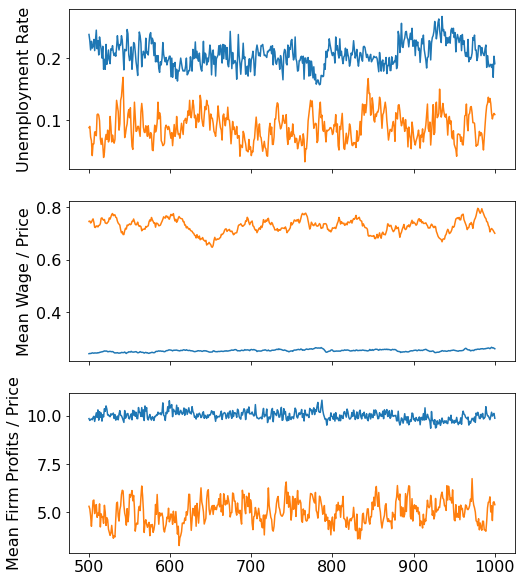

In [313]:
matplotlib.rcParams.update({'font.size': 16})
def paper_timeseries_subplot(ldf, var, separate_lines_var, ax, xlabel=None, ylabel=None, color=None, ylim=None, legend=None):
    sep_lines_vars = sorted(ldf[separate_lines_var].unique())
    for slv in sep_lines_vars:            
        tldf = ldf[ldf[separate_lines_var]==slv]
        ax.plot(tldf['[step]'], tldf[var])
    
    if ylabel == None:
        ylabel = var.replace('-', ' ').title()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylim)
    if legend:
        ax.legend(sep_lines_vars, title="P")
    
def paper_time_series_fig(ldf):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)
    
    paper_timeseries_subplot(ldf, 'unemployment-rate', 'max-prod-capacity-per-capita', axes[0])
    paper_timeseries_subplot(ldf, 'mean-wage-rate/cg-price', 'max-prod-capacity-per-capita',axes[1], ylabel='Mean Wage / Price')
    paper_timeseries_subplot(ldf, 'mean-current-profit-all-firms/price', 'max-prod-capacity-per-capita', axes[2],  ylabel='Mean Firm Profits / Price')

    plt.show()

tdf = pdf[pdf['max-prod-capacity-per-capita'].isin([1, 3])]
paper_time_series_fig(tdf)

### Plot individual trajectory

In [57]:
df["max-prod-capacity-per-capita"].unique()

array([0.2, 0.4, 0.6, 0.8, 1. , 1.1, 1.2, 1.3, 1.4, 1.6, 1.8, 2. , 3. ,
       4. ])

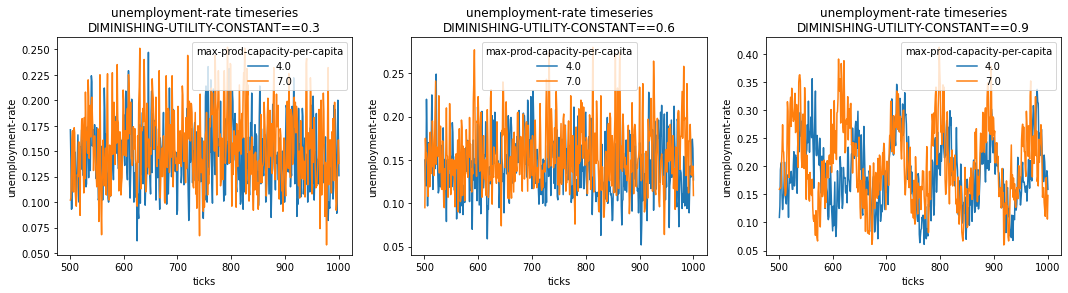

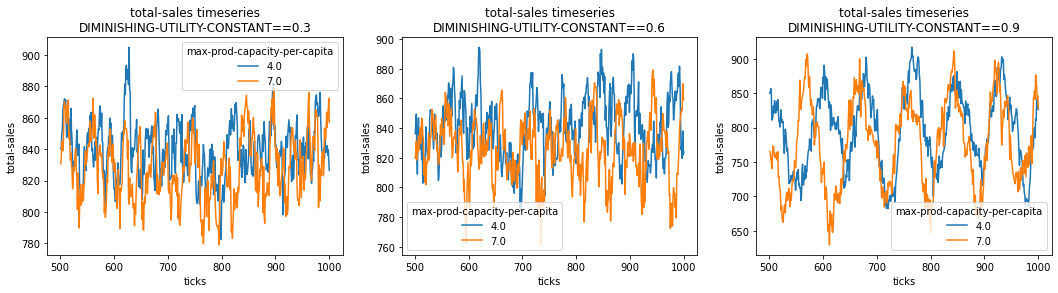

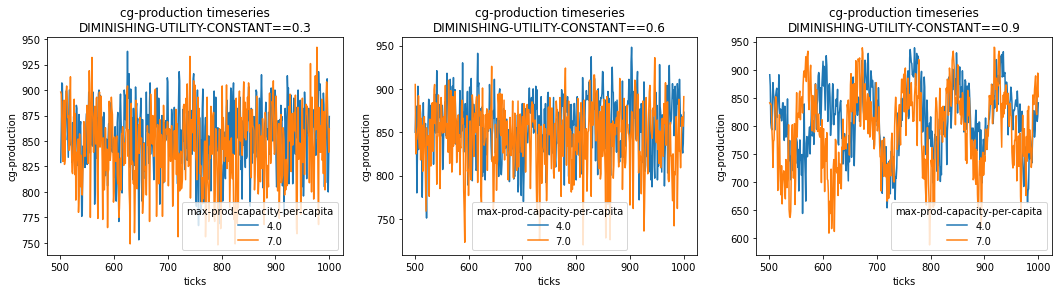

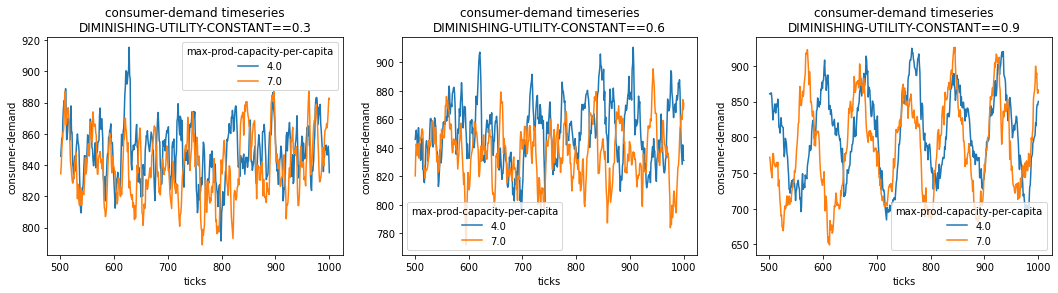

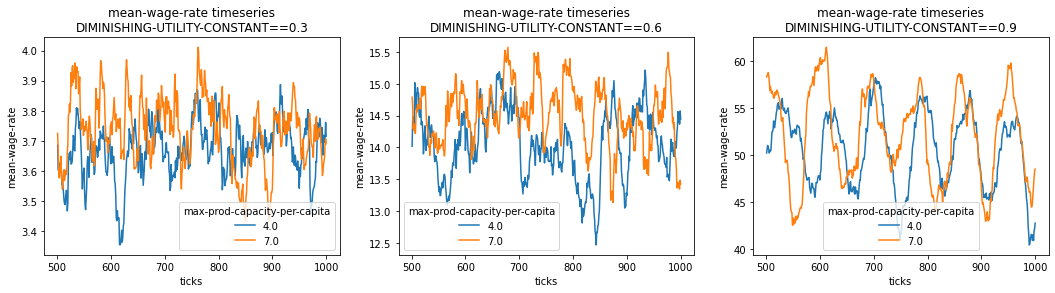

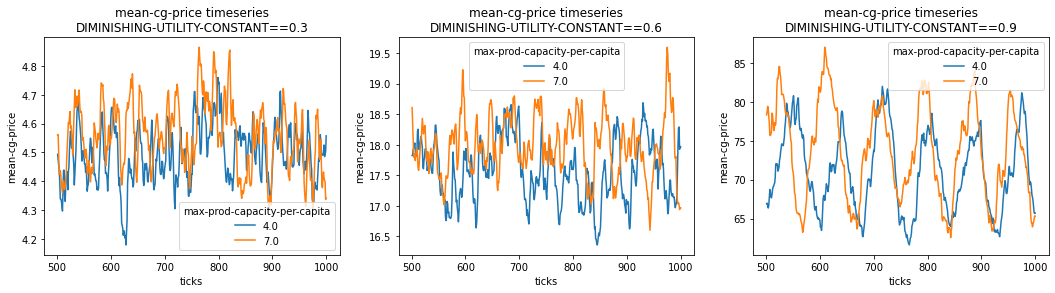

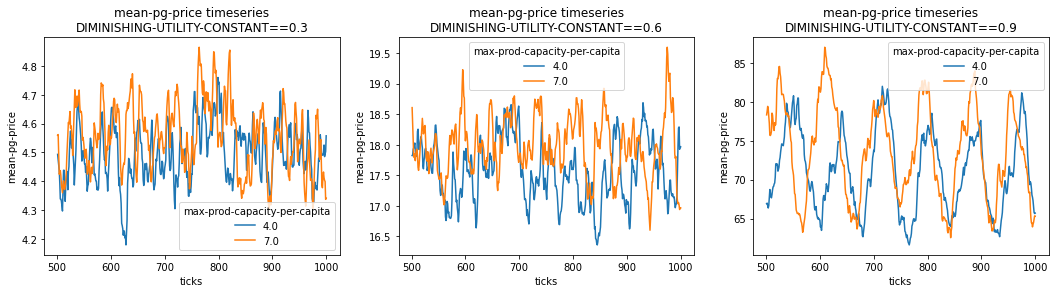

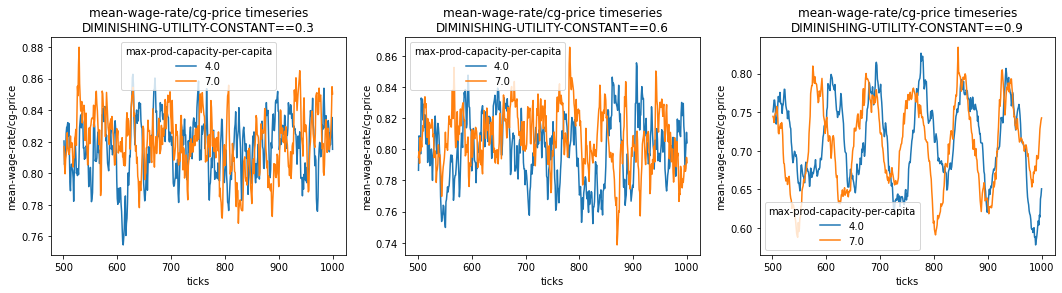

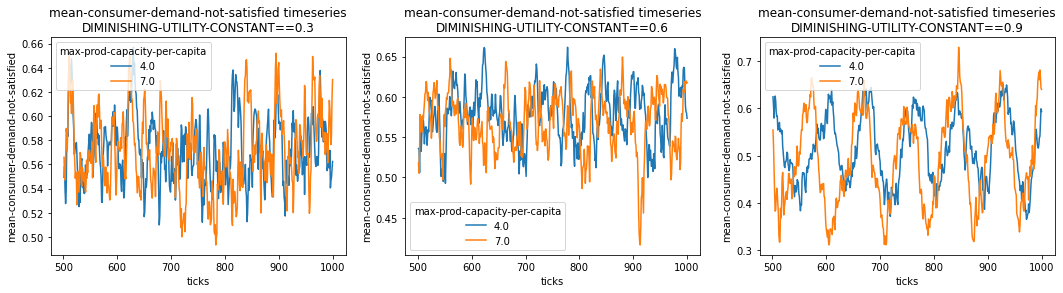

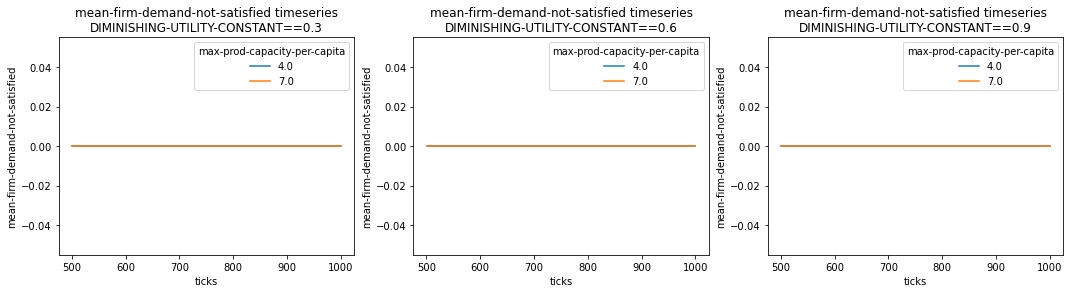

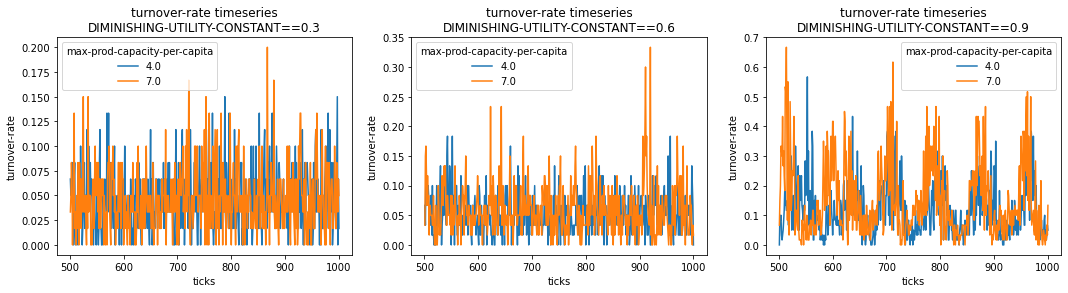

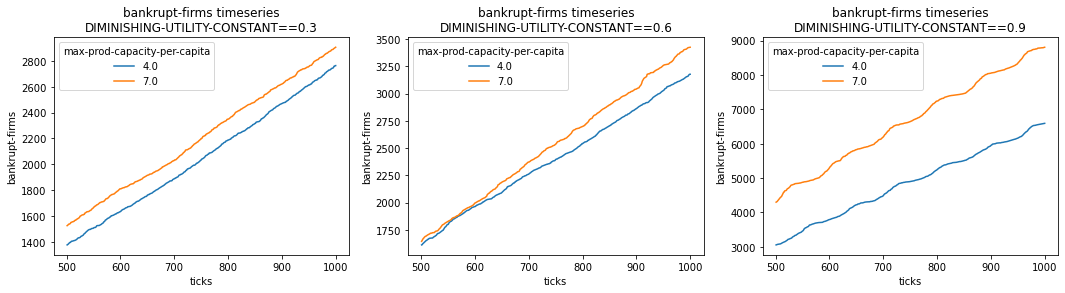

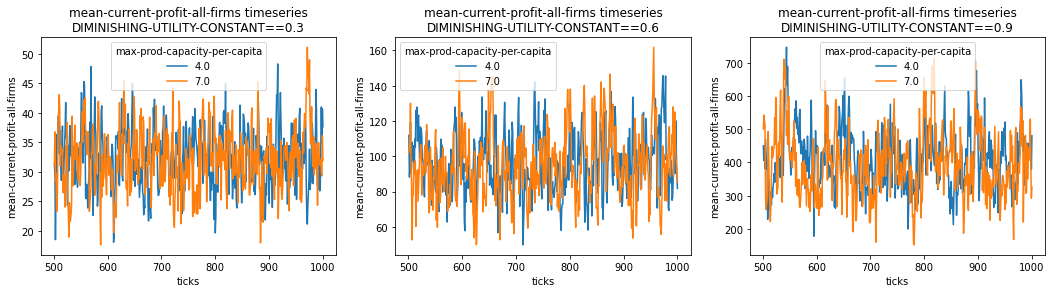

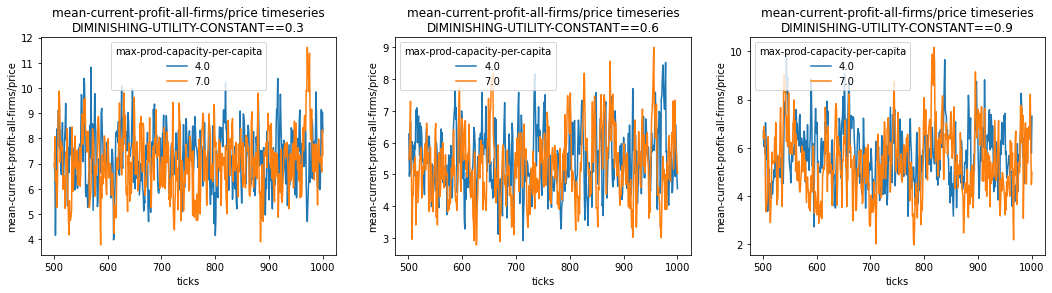

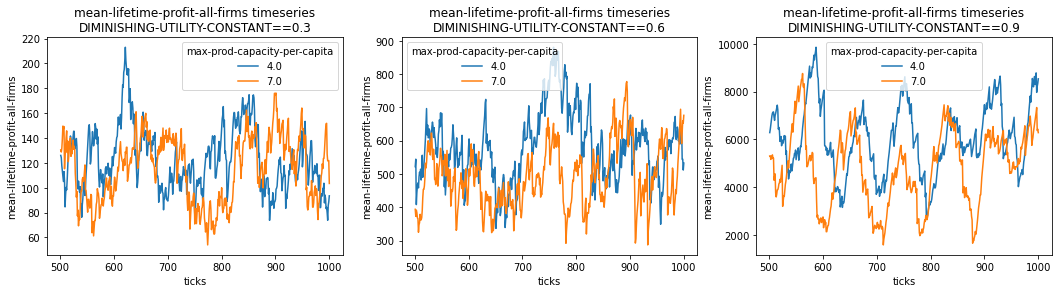

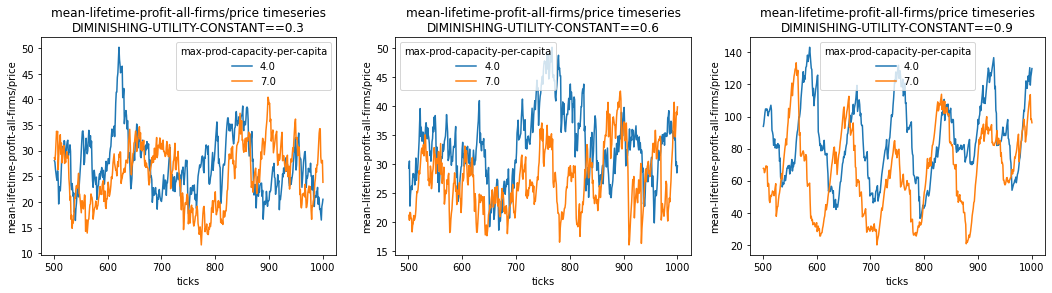

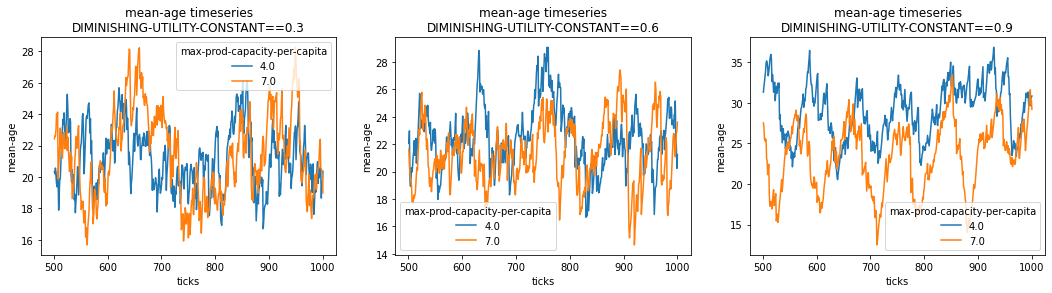

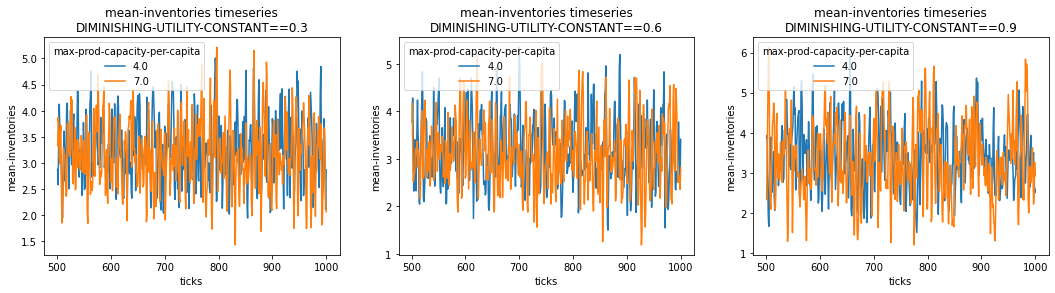

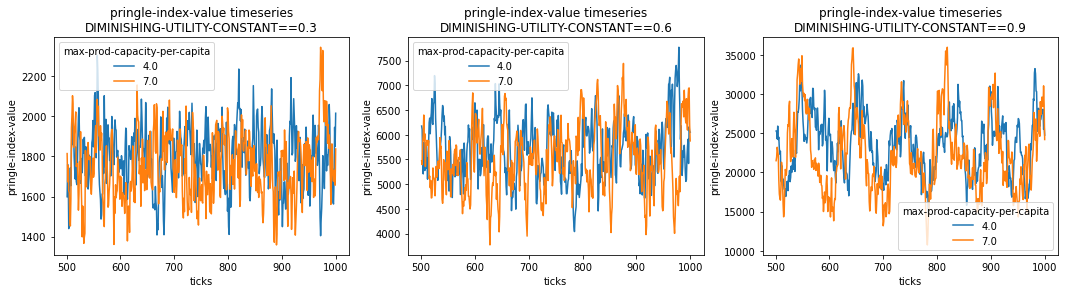

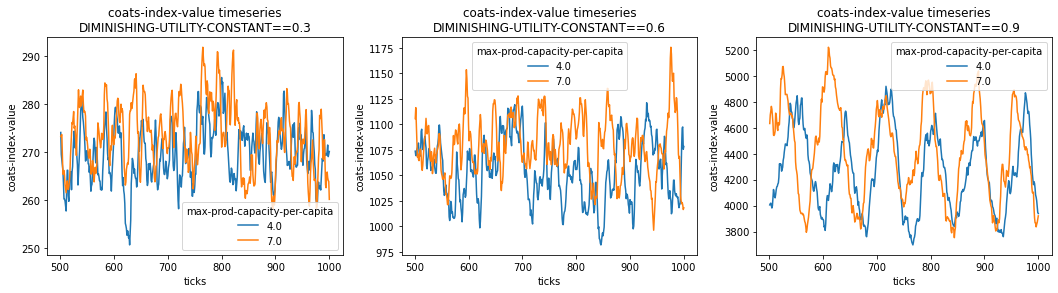

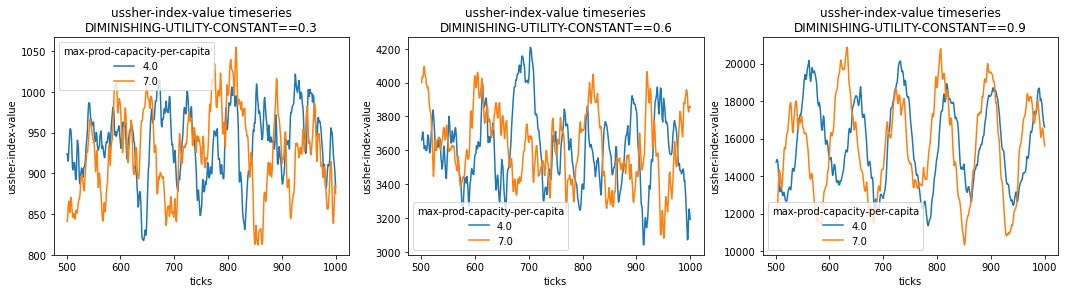

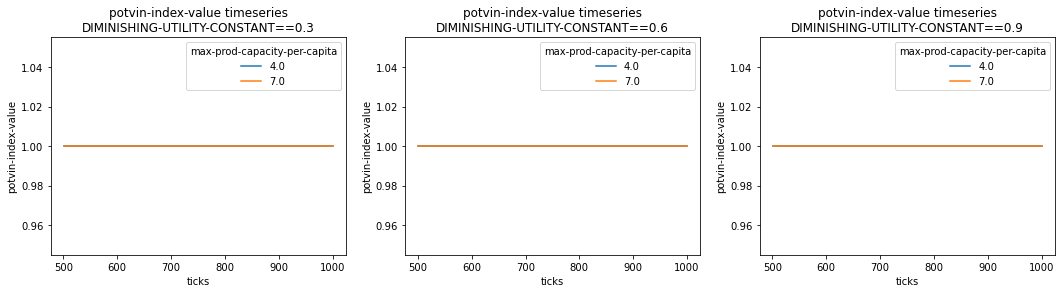

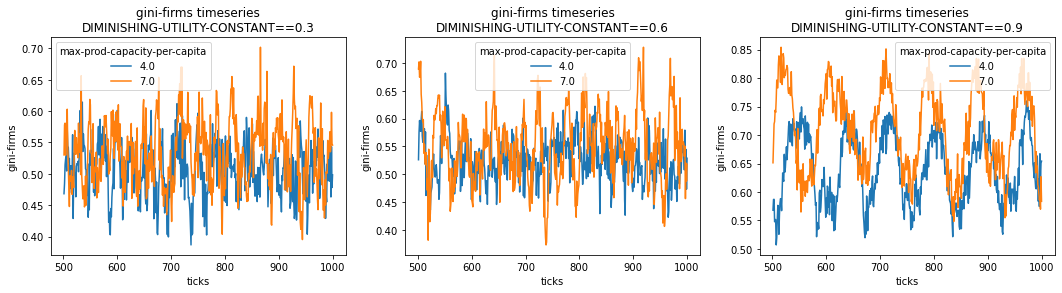

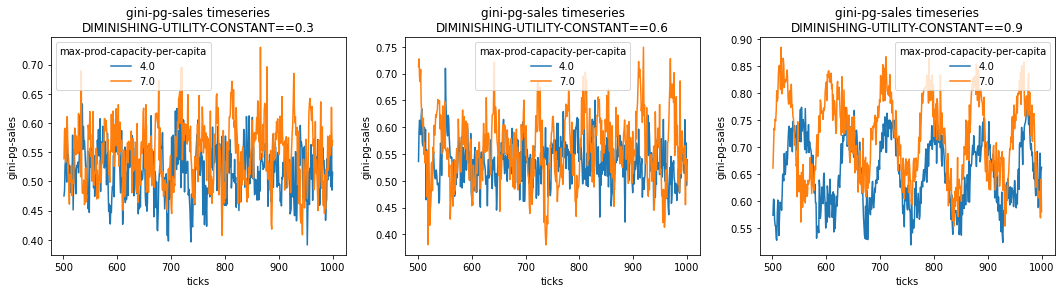

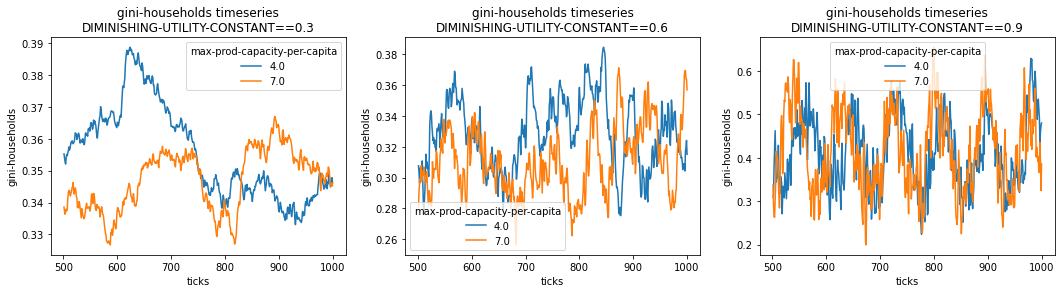

In [117]:

# tdf = df[(df["max-prod-capacity-per-capita"] == 5) & (df['[step]']>2000)]
# subplot_var_timeseries(tdf, 'pick-cheapest-firm?', 'DIMINISHING-UTILITY-CONSTANT')


# ["DIMINISHING-UTILITY-CONSTANT" 0.3 0.5 0.9]


# tdf = df[(df['[step]'] > 500) & (df['DIMINISHING-UTILITY-CONSTANT']==0.3) & (df['max-prod-capacity-per-capita'].isin([2]))]
tdf = df[(df['[step]'] > 500) & (df['pick-cheapest-firm?']==True) & (df['max-prod-capacity-per-capita'].isin([4, 7]))]
subplot_var_timeseries(tdf, 'DIMINISHING-UTILITY-CONSTANT', 'max-prod-capacity-per-capita')